In [207]:
import numpy as np
import pandas as pd
import os
import glob
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [208]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import LorentzianModel, GaussianModel

In [209]:
#loading all 6 peaks files
folder_path = 'spectroscopy_data/peaks_6'
csv_files = glob.glob(os.path.join(folder_path, '*.CSV'))
dataframes6peaks = []
i=0
for file in csv_files:
    i +=1
    df = pd.read_csv(file)
    dataframes6peaks.append(df)
    print(f"{i} Loaded {file}:")  # Display first few rows of each file


1 Loaded spectroscopy_data/peaks_6\6_ (1).CSV:
2 Loaded spectroscopy_data/peaks_6\6_ (10).CSV:
3 Loaded spectroscopy_data/peaks_6\6_ (2).CSV:
4 Loaded spectroscopy_data/peaks_6\6_ (3).CSV:
5 Loaded spectroscopy_data/peaks_6\6_ (4).CSV:
6 Loaded spectroscopy_data/peaks_6\6_ (5).CSV:
7 Loaded spectroscopy_data/peaks_6\6_ (6).CSV:
8 Loaded spectroscopy_data/peaks_6\6_ (7).CSV:
9 Loaded spectroscopy_data/peaks_6\6_ (8).CSV:
10 Loaded spectroscopy_data/peaks_6\6_ (9).CSV:
11 Loaded spectroscopy_data/peaks_6\CS-BB-22.CSV:
12 Loaded spectroscopy_data/peaks_6\CS-BB-23.CSV:


In [210]:
#loading all 5 peaks files
folder_path = 'spectroscopy_data/peaks_5'
csv_files = glob.glob(os.path.join(folder_path, '*.CSV'))
dataframes5peaks = []
i=0
for file in csv_files:
    i +=1
    df = pd.read_csv(file)
    dataframes5peaks.append(df)
    print(f"{i} Loaded {file}:")  # Display first few rows of each file


1 Loaded spectroscopy_data/peaks_5\5_ (1).CSV:
2 Loaded spectroscopy_data/peaks_5\5_ (10).CSV:
3 Loaded spectroscopy_data/peaks_5\5_ (11).CSV:
4 Loaded spectroscopy_data/peaks_5\5_ (2).CSV:
5 Loaded spectroscopy_data/peaks_5\5_ (3).CSV:
6 Loaded spectroscopy_data/peaks_5\5_ (4).CSV:
7 Loaded spectroscopy_data/peaks_5\5_ (5).CSV:
8 Loaded spectroscopy_data/peaks_5\5_ (6).CSV:
9 Loaded spectroscopy_data/peaks_5\5_ (7).CSV:
10 Loaded spectroscopy_data/peaks_5\5_ (8).CSV:
11 Loaded spectroscopy_data/peaks_5\5_ (9).CSV:


In [211]:
# switches between evaluating 5 or 6 peaks
which_peak_file = 5

In [212]:
def get_dataset(n, peaks = which_peak_file):
    if peaks == 6:
        x = dataframes6peaks[n]['[s]'] * 1000 #time axis now in ms
        y = dataframes6peaks[n]['CH1[V]'] * 100 #y axis in 100V
    else:
        x = dataframes5peaks[n]['[s]'] * 1000 #time axis now in ms
        y = dataframes5peaks[n]['CH1[V]'] * 100 #y axis in 100V
    return x,y

In [213]:
#loads in the 3rd dataset
x,y = get_dataset(3)

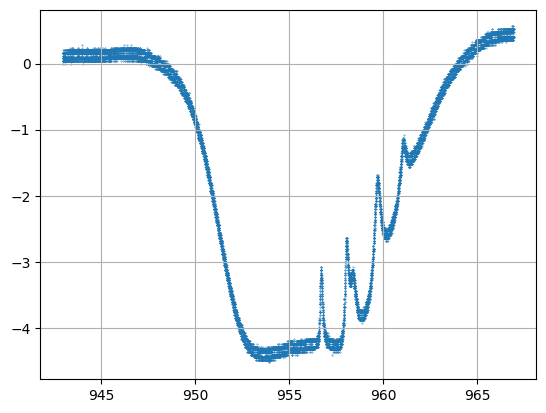

In [214]:
plt.scatter(x,y, s=0.1)
# plt.ylim(0,0.5)
# plt.xlim(960, 961)
plt.grid()

In [215]:
#function for moving average over 10 datapoints on the time axis

def move_ave(arr, window_size=10):
    window_size = 10

    numbers_series = pd.Series(arr)

    # Get the window of series
    # of observations of specified window size
    windows = numbers_series.rolling(window_size)

    # Create a series of moving
    # averages of each window
    moving_averages = windows.mean()

    # Convert pandas series back to list
    moving_averages_list = moving_averages.tolist()

    # Remove null entries from the list
    final_list = moving_averages_list[window_size - 1:]
    return final_list


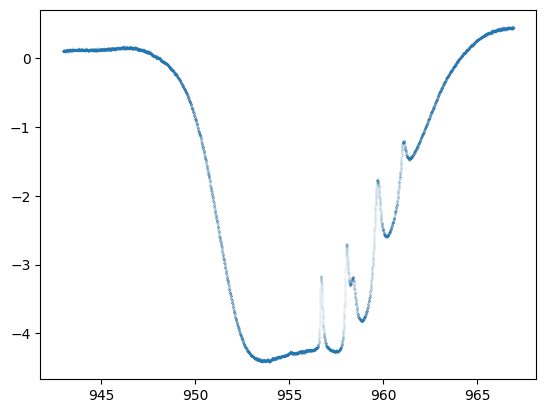

In [216]:
#getting&plotting moving averaged data

x_aveg = np.array(move_ave(x))
y_aveg = np.array(move_ave(y))
plt.scatter(x_aveg, y_aveg, s=0.001)

In [217]:
#gauss model for bk

gauss = GaussianModel(prefix='gauss_')
params = gauss.guess(y_aveg, x_aveg) #makes a guess for the initial params

In [218]:
#fits and returns params

model = gauss
out = model.fit(y_aveg, params, x=x_aveg)
print(out.fit_report(min_correl=0.3))
comps = out.eval_components()

[[Model]]
    Model(gaussian, prefix='gauss_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 80
    # data points      = 19991
    # variables        = 3
    chi-square         = 3598.26964
    reduced chi-square = 0.18002149
    Akaike info crit   = -34275.1485
    Bayesian info crit = -34251.4394
    R-squared          = 0.94644991
[[Variables]]
    gauss_amplitude: -42.2304396 +/- 0.06388272 (0.15%) (init = 175.88)
    gauss_center:     955.605387 +/- 0.00620302 (0.00%) (init = 954.3924)
    gauss_sigma:      3.55166889 +/- 0.00620533 (0.17%) (init = 11.994)
    gauss_fwhm:       8.36354093 +/- 0.01461243 (0.17%) == '2.3548200*gauss_sigma'
    gauss_height:    -4.74354712 +/- 0.00717528 (0.15%) == '0.3989423*gauss_amplitude/max(1e-15, gauss_sigma)'
[[Correlations]] (unreported correlations are < 0.300)
    C(gauss_amplitude, gauss_sigma) = -0.5775


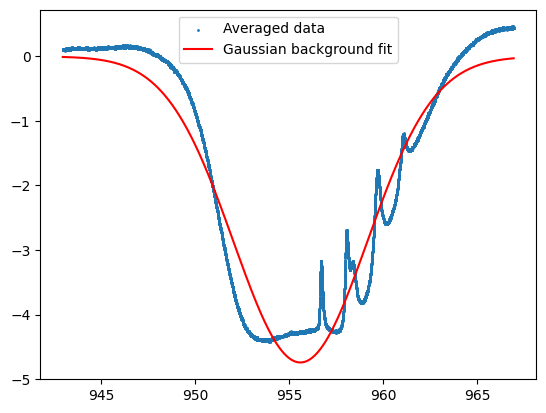

In [219]:
plt.scatter(x_aveg, y_aveg, s=1, label = 'Averaged data')
plt.plot(x_aveg, out.best_fit, label='Gaussian background fit', color= 'red')
plt.legend()

In [220]:
#subtract gaussian bkg from the averaged data

ynew = y_aveg - comps['gauss_']
ynew *= 100 #just so that it's in the bigger numbers (now scaling of 10000 to og)

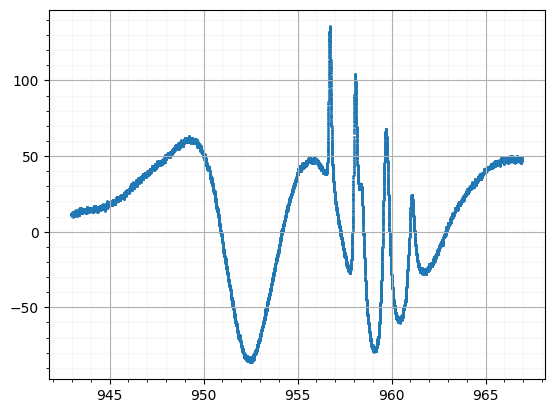

In [221]:
plt.scatter(x_aveg, ynew, s=1)
plt.minorticks_on()
plt.grid(which='minor', alpha =0.1)
plt.grid(which='major')

In [222]:
#give the cuts for Peak evaluation, so that the wings don't disturb it, the closer the better

left = 956
right = 962

In [223]:
left_cut = np.abs(x_aveg - left).argmin()
right_cut = np.abs(x_aveg - right).argmin()
x = x_aveg[left_cut:right_cut]
y = ynew[left_cut:right_cut]

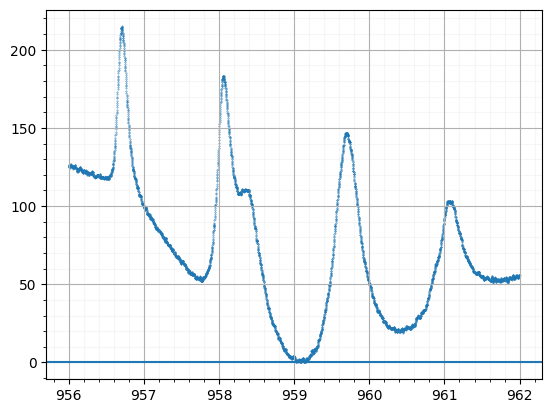

In [224]:
y += abs(min(y)) #raise above 0, better for lorentz fit
plt.scatter(x,y,s=0.1)
plt.minorticks_on()
plt.grid(which='minor', alpha =0.1)
plt.grid(which='major')
plt.axhline(0)

### eval peaks

In [225]:
#give good approximation for centers (they have to be within .5 to each side)

p1 = 956.7
p2 = 958
p3 = 958.4
p4 = 959.7
p5 = 961
p6 = 666

centers = [p1, p2, p3, p4, p5, p6]
centers = centers[:which_peak_file] # selects only estimates for p1 to p5 if it's 5 peaks

In [226]:
#initiates a model for each peak

lorentzians = np.zeros(which_peak_file, dtype=object)
for i in range(which_peak_file):
    lorentzians[i] = LorentzianModel(prefix=('l'+f'{i}'+'_'))
    # print('l'+f'{i}'+'_')
    # print(lorentzians[i])
    if i == 0:
        print(i)
        params = lorentzians[i].make_params(
            center = dict(value = centers[i], min = centers[i]-0.5, max = centers[i] + 0.5),
            sigma = 0.2,
            amplitude = 80,
            height = dict(value = 80, min = 0)
        )
    else:
        # print(i)
        params.update(lorentzians[i].make_params(
            center = dict(value = centers[i], min = centers[i]-0.5, max = centers[i] + 0.5),
            sigma = 0.2,
            amplitude = 80
        ))
params

0


name,value,initial value,min,max,vary,expression
l0_amplitude,80.0000000,80.0,-inf,inf,True,
l0_center,956.700000,956.7,956.200000,957.200000,True,
l0_sigma,0.20000000,0.2,0.00000000,inf,True,
l0_fwhm,0.40000000,None,-inf,inf,False,2.0000000*l0_sigma
l0_height,80.0000000,80,0.00000000,inf,False,
l1_amplitude,80.0000000,80.0,-inf,inf,True,
l1_center,958.000000,958,957.500000,958.500000,True,
l1_sigma,0.20000000,0.2,0.00000000,inf,True,
l1_fwhm,0.40000000,None,-inf,inf,False,2.0000000*l1_sigma
l1_height,127.323960,None,-inf,inf,False,"0.3183099*l1_amplitude/max(1e-15, l1_sigma)"


In [227]:
#fit and resulting params

model = lorentzians[0]
for i in range(1,which_peak_file):
    model += lorentzians[i]

init = model.eval(params, x=x)
out = model.fit(y, params, x=x) 
print(out.fit_report(min_correl=0.3))


[[Model]]
    ((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 355
    # data points      = 5000
    # variables        = 15
    chi-square         = 1192234.35
    reduced chi-square = 239.164364
    Akaike info crit   = 27400.7326
    Bayesian info crit = 27498.4905
    R-squared          = 0.88588208
[[Variables]]
    l0_amplitude:  318.642617 +/- 2.79002811 (0.88%) (init = 80)
    l0_center:     956.579520 +/- 0.00408060 (0.00%) (init = 956.7)
    l0_sigma:      0.68064376 +/- 0.00781925 (1.15%) (init = 0.2)
    l0_fwhm:       1.36128751 +/- 0.01563851 (1.15%) == '2.0000000*l0_sigma'
    l0_height:     80 (fixed)
    l1_amplitude:  47.2427037 +/- 1.14006663 (2.41%) (init = 80)
    l1_center:     958.071636 +/- 0.00153664 (0.00%) (init = 958)
    l1_sigma:      0.10298091 +/- 0.0026

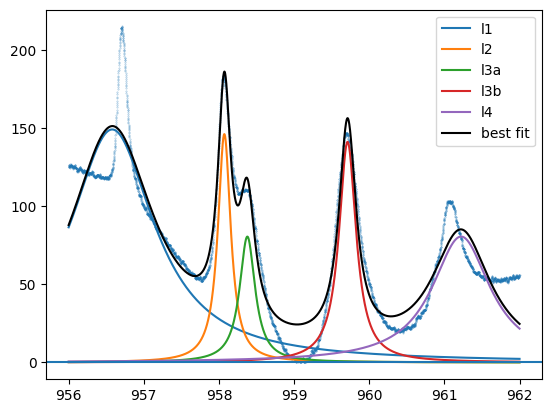

In [228]:
#plot

comps = out.eval_components()

plt.plot(x, comps['l0_'], label='l1')
plt.plot(x, comps['l1_'], label='l2')
plt.plot(x, comps['l2_'], label='l3a')
plt.plot(x, comps['l3_'], label='l3b')
plt.plot(x, comps['l4_'], label='l4')
if which_peak_file == 6:
    plt.plot(x, comps['l5_'], label='l5')

plt.plot(x, out.best_fit, label='best fit', color= 'black', alpha = 1)
plt.scatter(x,y,s=0.1, alpha = 0.5)
plt.axhline(0)
# plt.xlim(950,956)
plt.legend()

### result centers

In [229]:
result_peaks = np.zeros(which_peak_file)
i = 0
print('col1:    peak centers     col2: stdev')
for name, param in out.params.items():
    if 'center' in name:
        print(f'{name:7s} {param.value:11.5f} {param.stderr:11.5f}')
        result_peaks[i] = param.value
        i+=1

col1:    peak centers     col2: stdev
l0_center   956.57952     0.00408
l1_center   958.07164     0.00154
l2_center   958.37778     0.00322
l3_center   959.71100     0.00159
l4_center   961.22163     0.00531


In [230]:
# in case , this is the var where the specs are saved
out